In [34]:
# read to csv
import pandas as pd
# import pystan  before use fbprophet
import pystan
# library for Predicting
from fbprophet import Prophet

In [35]:
df = pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [36]:
# avocado data's instruction
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [37]:
# see the regions , we will only use TotalUS
df.groupby("region").mean()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
region,,,,,,,,,,,
Albany,24.236686,1.561036,4.753787e+04,1.824082e+03,3.762121e+04,162.832337,7.929747e+03,6.647765e+03,1.153496e+03,128.488639,2016.147929
Atlanta,24.236686,1.337959,2.621453e+05,1.461169e+05,3.121851e+04,311.385769,8.449856e+04,5.160573e+04,3.207004e+04,822.786036,2016.147929
BaltimoreWashington,24.236686,1.534231,3.985619e+05,3.565622e+04,2.459829e+05,12466.730976,1.044561e+05,1.009397e+05,2.903985e+03,612.382722,2016.147929
Boise,24.236686,1.348136,4.264257e+04,2.001951e+04,3.461682e+03,3186.787840,1.597459e+04,1.384004e+04,2.103634e+03,30.915207,2016.147929
Boston,24.236686,1.530888,2.877929e+05,4.994610e+03,2.142199e+05,4982.294970,6.359609e+04,5.890659e+04,4.438365e+03,251.124231,2016.147929
BuffaloRochester,24.236686,1.516834,6.793630e+04,1.776671e+03,3.166395e+04,144.335976,3.435134e+04,3.037998e+04,3.729050e+03,242.313432,2016.147929
California,24.236686,1.395325,3.044324e+06,1.180376e+06,1.039915e+06,94204.276746,7.298290e+05,6.778038e+05,3.642585e+04,15599.342929,2016.147929
Charlotte,24.236686,1.606036,1.051939e+05,2.237814e+04,3.662802e+04,11578.467574,3.460930e+04,3.149069e+04,2.912684e+03,205.927781,2016.147929
Chicago,24.236686,1.556775,3.955690e+05,3.208308e+04,2.545190e+05,59069.204290,4.989763e+04,4.377116e+04,5.005547e+03,1120.925178,2016.147929


In [49]:
# Data Preprocessing(type = conventional & region = TotalUS)
df = df.loc[(df.type =='conventional') & (df.region == 'TotalUS')]
# transform String to DatetimeIndex
df["Date"] = pd.to_datetime(df["Date"])
# all delete without Date & AveragePrice
data = df[["Date", "AveragePrice"]].reset_index(drop=True)
# rename label 
data = data.rename(columns={'Date': 'ds', 'AveragePrice': 'y'})
data.head()

,ds,y
0,2015-12-27,0.95
1,2015-12-20,0.98
2,2015-12-13,0.93
3,2015-12-06,0.89
4,2015-11-29,0.99


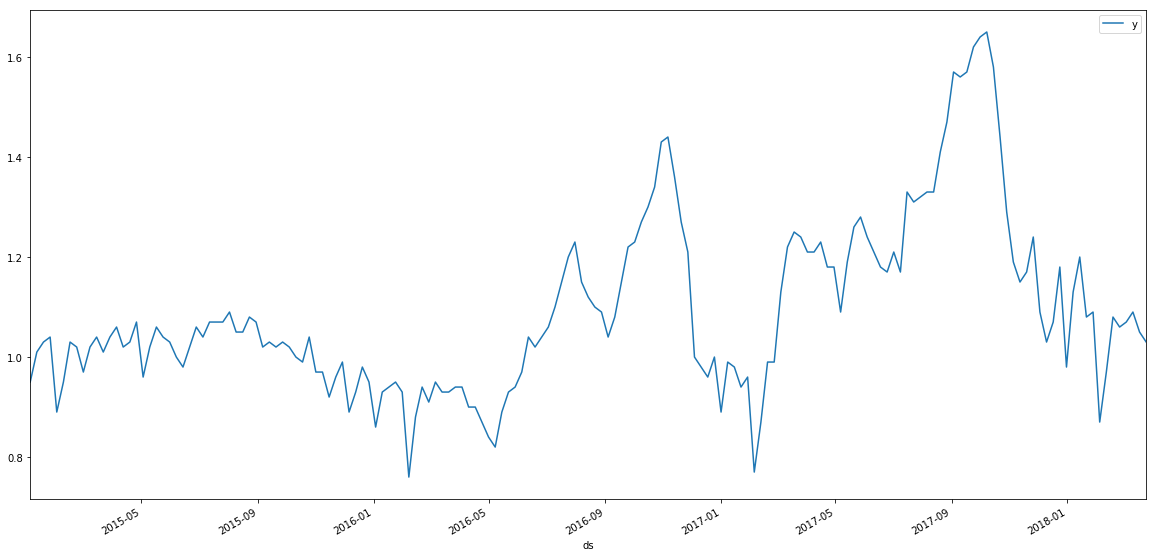

In [50]:
# avocado data visualization
data.plot(x="ds", y="y", figsize=(20,10))

In [51]:
# data learn
m = Prophet()
m.fit(data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [52]:
# set predicting period
future = m.make_future_dataframe(periods=730)
future.tail()

,ds
894,2020-03-20
895,2020-03-21
896,2020-03-22
897,2020-03-23
898,2020-03-24


In [54]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
894,2020-03-20,1.151419,0.878242,1.334155,0.963148,1.334893,-0.059840,-0.059840,-0.059840,-0.059840,-0.059840,-0.059840,0.0,0.0,0.0,1.091579
895,2020-03-21,1.151331,0.877155,1.309410,0.963070,1.335221,-0.058505,-0.058505,-0.058505,-0.058505,-0.058505,-0.058505,0.0,0.0,0.0,1.092826
896,2020-03-22,1.151242,0.879978,1.314384,0.963074,1.335549,-0.056690,-0.056690,-0.056690,-0.056690,-0.056690,-0.056690,0.0,0.0,0.0,1.094552
897,2020-03-23,1.151154,0.877725,1.327010,0.962760,1.335876,-0.054408,-0.054408,-0.054408,-0.054408,-0.054408,-0.054408,0.0,0.0,0.0,1.096746
898,2020-03-24,1.151066,0.884446,1.328121,0.962381,1.336080,-0.051686,-0.051686,-0.051686,-0.051686,-0.051686,-0.051686,0.0,0.0,0.0,1.099379


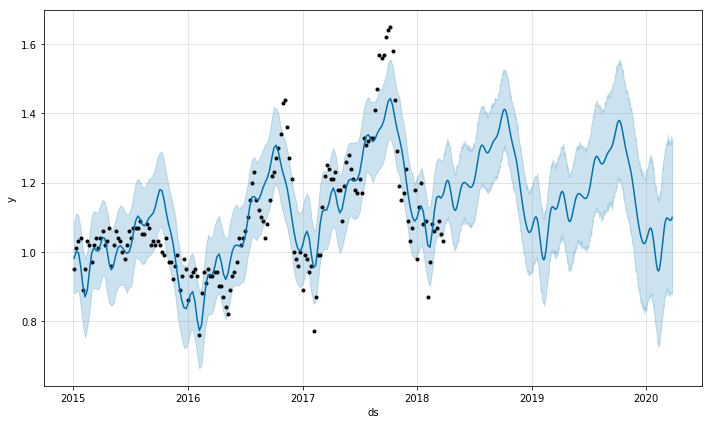

In [55]:
# predicted avocado's price visualization
fig1 = m.plot(forecast)

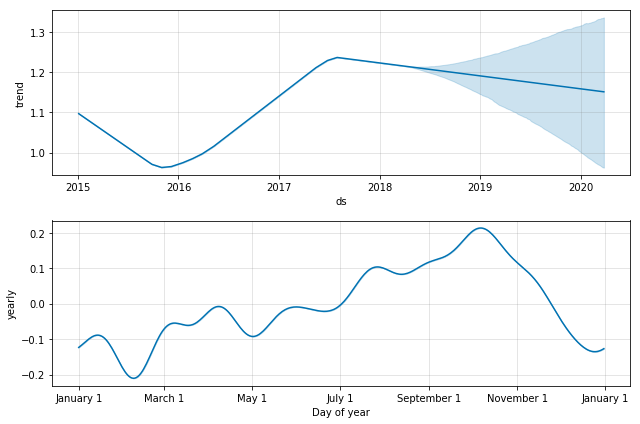

In [56]:
# forecast components visualization
fig2 = m.plot_components(forecast)